In [1]:
import pandas as pd
import numpy as np

In [2]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

path = kagglehub.dataset_download("robertocarlost/fmcg-multi-country-sales-dataset")

print("Path to dataset files:", path)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\robertocarlost\fmcg-multi-country-sales-dataset\versions\1


In [13]:
import os

# First, see what's in the folder
print("Files in dataset:", os.listdir(path))

# Then use the correct filename you see in the output
df = pd.read_csv(os.path.join(path, "fmcg_sales_3years_1M_rows.csv"))  # Replace with actual filename
df.head()

Files in dataset: ['fmcg_sales_3years_1M_rows.csv']


,date,year,month,day,weekofyear,weekday,is_weekend,is_holiday,temperature,rain_mm,...,discount_pct,promo_flag,gross_sales,net_sales,stock_on_hand,stock_out_flag,lead_time_days,supplier_id,purchase_cost,margin_pct
0,2021-01-01,2021,1,1,53,4,0,1,8.44,1.24,...,0.1,1,167.84,151.06,248,0,11,S008,7.53,0.182
1,2021-01-02,2021,1,2,53,5,1,0,12.61,1.12,...,0.0,0,125.88,125.88,238,0,6,S057,5.19,0.505
2,2021-01-03,2021,1,3,53,6,1,0,12.02,2.69,...,0.3,1,398.62,279.03,238,0,6,S017,5.59,0.168
3,2021-01-04,2021,1,4,1,0,0,0,7.76,4.65,...,0.0,0,83.92,83.92,216,0,7,S012,7.81,0.255
4,2021-01-05,2021,1,5,1,1,0,0,11.16,1.77,...,0.2,1,178.33,142.66,372,0,8,S038,7.62,0.073


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 33 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1100000 non-null  object 
 1   year            1100000 non-null  int64  
 2   month           1100000 non-null  int64  
 3   day             1100000 non-null  int64  
 4   weekofyear      1100000 non-null  int64  
 5   weekday         1100000 non-null  int64  
 6   is_weekend      1100000 non-null  int64  
 7   is_holiday      1100000 non-null  int64  
 8   temperature     1100000 non-null  float64
 9   rain_mm         1100000 non-null  float64
 10  store_id        1100000 non-null  object 
 11  country         1100000 non-null  object 
 12  city            1100000 non-null  object 
 13  channel         1100000 non-null  object 
 14  latitude        1100000 non-null  float64
 15  longitude       1100000 non-null  float64
 16  sku_id          1100000 non-null  ob

Kolom date bertipe data object, perlu diubah menjadi datetime.

In [15]:
df['date'] = pd.to_datetime(df['date'])

Karena model machine learning tidak mampu menangani data kategorikal, maka perlu dilakukan preprocessing data agar model dapat menangani data tersebut.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['country'])

In [17]:
df = pd.get_dummies(df, columns=['channel', 'category'])

normalisasi data diperlukan sebab data tidak berada dalam skala yang sama

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # atau MinMaxScaler()
numerical_cols = ['temperature', 'rain_mm', 'list_price', 'gross_sales', 'net_sales']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

kolom seperti 

In [20]:
import numpy as np

# Menggunakan IQR method
Q1 = df['gross_sales'].quantile(0.25)
Q3 = df['gross_sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter atau cap outliers
df = df[(df['gross_sales'] >= lower_bound) & (df['gross_sales'] <= upper_bound)]
# Atau capping
df['gross_sales'] = df['gross_sales'].clip(lower_bound, upper_bound)

In [21]:
# Hapus kolom yang redundan/derivatif
df.drop(columns=['year', 'month', 'day', 'weekofyear', 'weekday'], inplace=True)

In [22]:
df['is_weekend'] = df['is_weekend'].astype(bool)
df['is_holiday'] = df['is_holiday'].astype(bool)
df['promo_flag'] = df['promo_flag'].astype(bool)
df['stock_out_flag'] = df['stock_out_flag'].astype(bool)

In [25]:
print(df.columns.tolist())

['date', 'is_weekend', 'is_holiday', 'temperature', 'rain_mm', 'store_id', 'country', 'city', 'latitude', 'longitude', 'sku_id', 'sku_name', 'subcategory', 'brand', 'units_sold', 'list_price', 'discount_pct', 'promo_flag', 'gross_sales', 'net_sales', 'stock_on_hand', 'stock_out_flag', 'lead_time_days', 'supplier_id', 'purchase_cost', 'margin_pct', 'country_encoded', 'channel_Convenience', 'channel_E-commerce', 'channel_Hypermarket', 'channel_Supermarket', 'category_Beverages', 'category_Dairy', 'category_Home Care', 'category_Personal Care', 'category_Snacks']


In [27]:
df

,date,is_weekend,is_holiday,temperature,rain_mm,store_id,country,city,latitude,longitude,...,country_encoded,channel_Convenience,channel_E-commerce,channel_Hypermarket,channel_Supermarket,category_Beverages,category_Dairy,category_Home Care,category_Personal Care,category_Snacks
0,2021-01-01,False,True,-1.297611,-0.792811,STORE0001,Germany,Berlin,52.52586,13.39071,...,2,False,False,True,False,False,False,False,True,False
1,2021-01-02,True,False,-0.060804,-0.849981,STORE0001,Germany,Berlin,52.52586,13.39071,...,2,False,False,True,False,False,False,False,True,False
2,2021-01-03,True,False,-0.235796,-0.102004,STORE0001,Germany,Berlin,52.52586,13.39071,...,2,False,False,True,False,False,False,False,True,False
3,2021-01-04,False,False,-1.499296,0.831776,STORE0001,Germany,Berlin,52.52586,13.39071,...,2,False,False,True,False,False,False,False,True,False
4,2021-01-05,False,False,-0.490869,-0.540309,STORE0001,Germany,Berlin,52.52586,13.39071,...,2,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,2022-09-08,False,False,-0.134953,-1.359748,STORE0013,Netherlands,Amsterdam,52.36231,4.95850,...,4,True,False,False,False,False,False,True,False,False
1099996,2022-09-09,False,False,-0.090464,1.455884,STORE0013,Netherlands,Amsterdam,52.36231,4.95850,...,4,True,False,False,False,False,False,True,False,False
1099997,2022-09-10,True,False,0.048937,1.598809,STORE0013,Netherlands,Amsterdam,52.36231,4.95850,...,4,True,False,False,False,False,False,True,False,False
1099998,2022-09-11,True,False,1.158207,-1.288286,STORE0013,Netherlands,Amsterdam,52.36231,4.95850,...,4,True,False,False,False,False,False,True,False,False


In [31]:
df_original = pd.read_csv(os.path.join(path, "fmcg_sales_3years_1M_rows.csv"))
df_processed = df.copy()

In [43]:
print("=" * 60)
print("PERBANDINGAN SEBELUM DAN SESUDAH PREPROCESSING")
print("=" * 60)

# ==========================================
# MEMORY USAGE
# ==========================================
print("\n📊 MEMORY USAGE:")
print(f"   Sebelum: {df_original.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Sesudah: {df_processed.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Pengurangan: {(1 - df_processed.memory_usage(deep=True).sum() / df_original.memory_usage(deep=True).sum()) * 100:.1f}%")

# ==========================================
# PERBANDINGAN TIPE DATA
# ==========================================
print("\n📋 PERBANDINGAN TIPE DATA:")

comparison = pd.DataFrame({
    'Sebelum': df_original.dtypes,
    'Sesudah': df_processed.dtypes
})

comparison['Berubah'] = comparison['Sebelum'].astype(str) != comparison['Sesudah'].astype(str)

# tampilkan semua tanpa ringkasan
print(comparison[comparison['Berubah']])

# ==========================================
# SAMPLE DATA COMPARISON
# ==========================================
common_cols = ['date', 'is_weekend', 'country', 'units_sold']  # kolom yang ada di kedua DF

print("\n📝 SAMPLE DATA SEBELUM PREPROCESSING:")
print(df_original[common_cols].head())

print("\n📝 SAMPLE DATA SESUDAH PREPROCESSING:")
print(df_processed[common_cols].head())

# ==========================================
# ONE-HOT ENCODING COLUMNS
# ==========================================
print("\n🆕 KOLOM BARU HASIL ONE-HOT ENCODING:")
new_cols = [col for col in df_processed.columns if col not in df_original.columns]
print(new_cols)

print("\n📝 SAMPLE KOLOM ONE-HOT ENCODED:")
if new_cols:
    print(df_processed[new_cols[:5]].head())

# ==========================================
# INFO lengkap (tanpa diringkas)
# ==========================================
print("\n" + "=" * 60)
print("INFO SEBELUM PREPROCESSING:")
print("=" * 60)
df_original.info(max_cols=None, show_counts=True)

print("\n" + "=" * 60)
print("INFO SESUDAH PREPROCESSING:")
print("=" * 60)
df_processed.info(max_cols=None, show_counts=True)

PERBANDINGAN SEBELUM DAN SESUDAH PREPROCESSING

📊 MEMORY USAGE:
   Sebelum: 841.62 MB
   Sesudah: 130.85 MB
   Pengurangan: 84.5%

📋 PERBANDINGAN TIPE DATA:
                       Sebelum         Sesudah  Berubah
brand                   object        category     True
category                object             NaN     True
category_Beverages         NaN            bool     True
category_Dairy             NaN            bool     True
category_Home Care         NaN            bool     True
category_Personal Care     NaN            bool     True
category_Snacks            NaN            bool     True
channel                 object             NaN     True
channel_Convenience        NaN            bool     True
channel_E-commerce         NaN            bool     True
channel_Hypermarket        NaN            bool     True
channel_Supermarket        NaN            bool     True
city                    object        category     True
country                 object        category     True
cou

In [45]:
%pip install matplotlib seaborn

  Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.0-cp314-cp314-win_amd64.whl.metadata (115 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.0-cp314-cp314-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)
Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl (7.1 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ---------------------------------------- 0/8 [pyparsing]
   -

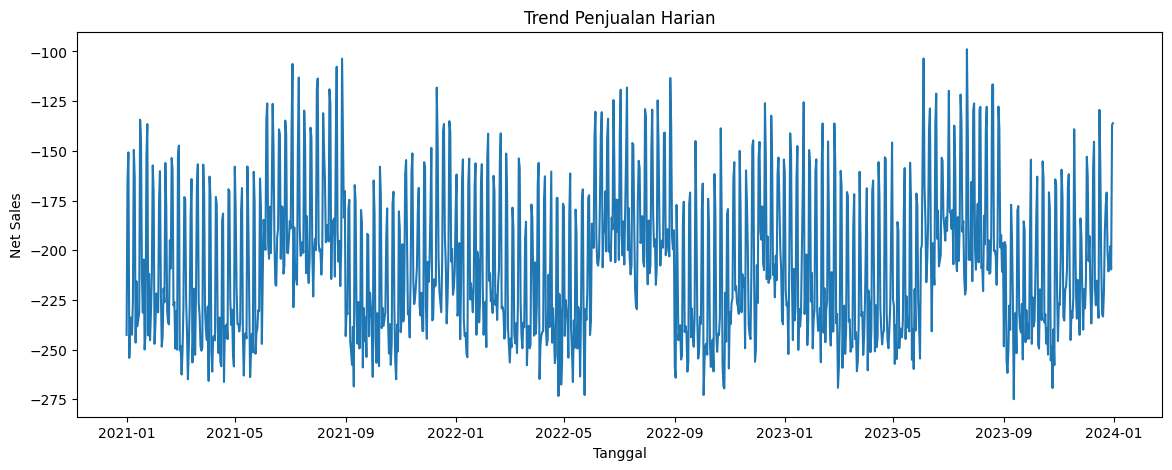

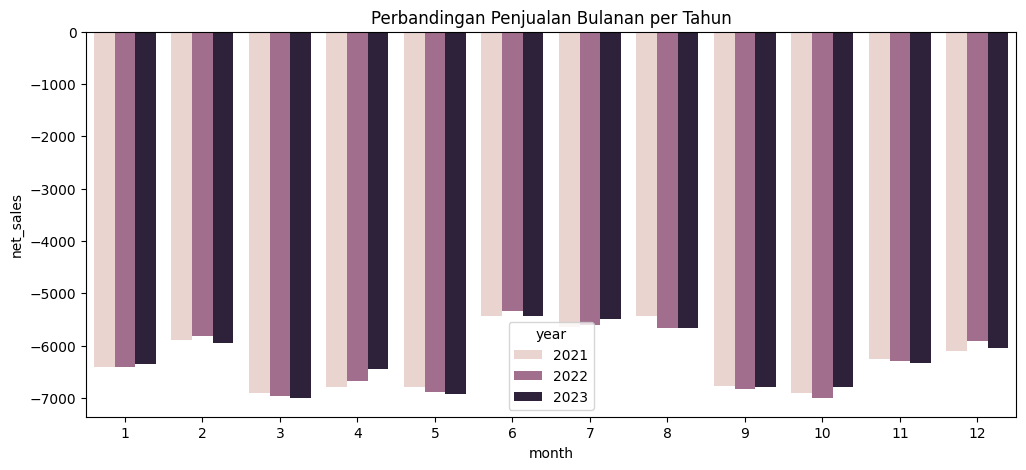

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend penjualan harian
daily_sales = df.groupby('date')['net_sales'].sum()
plt.figure(figsize=(14, 5))
plt.plot(daily_sales)
plt.title('Trend Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Net Sales')
plt.show()

# Penjualan per bulan - EXTRACT year dan month dari kolom date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

monthly_sales = df.groupby(['year', 'month'])['net_sales'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_sales, x='month', y='net_sales', hue='year')
plt.title('Perbandingan Penjualan Bulanan per Tahun')
plt.show()

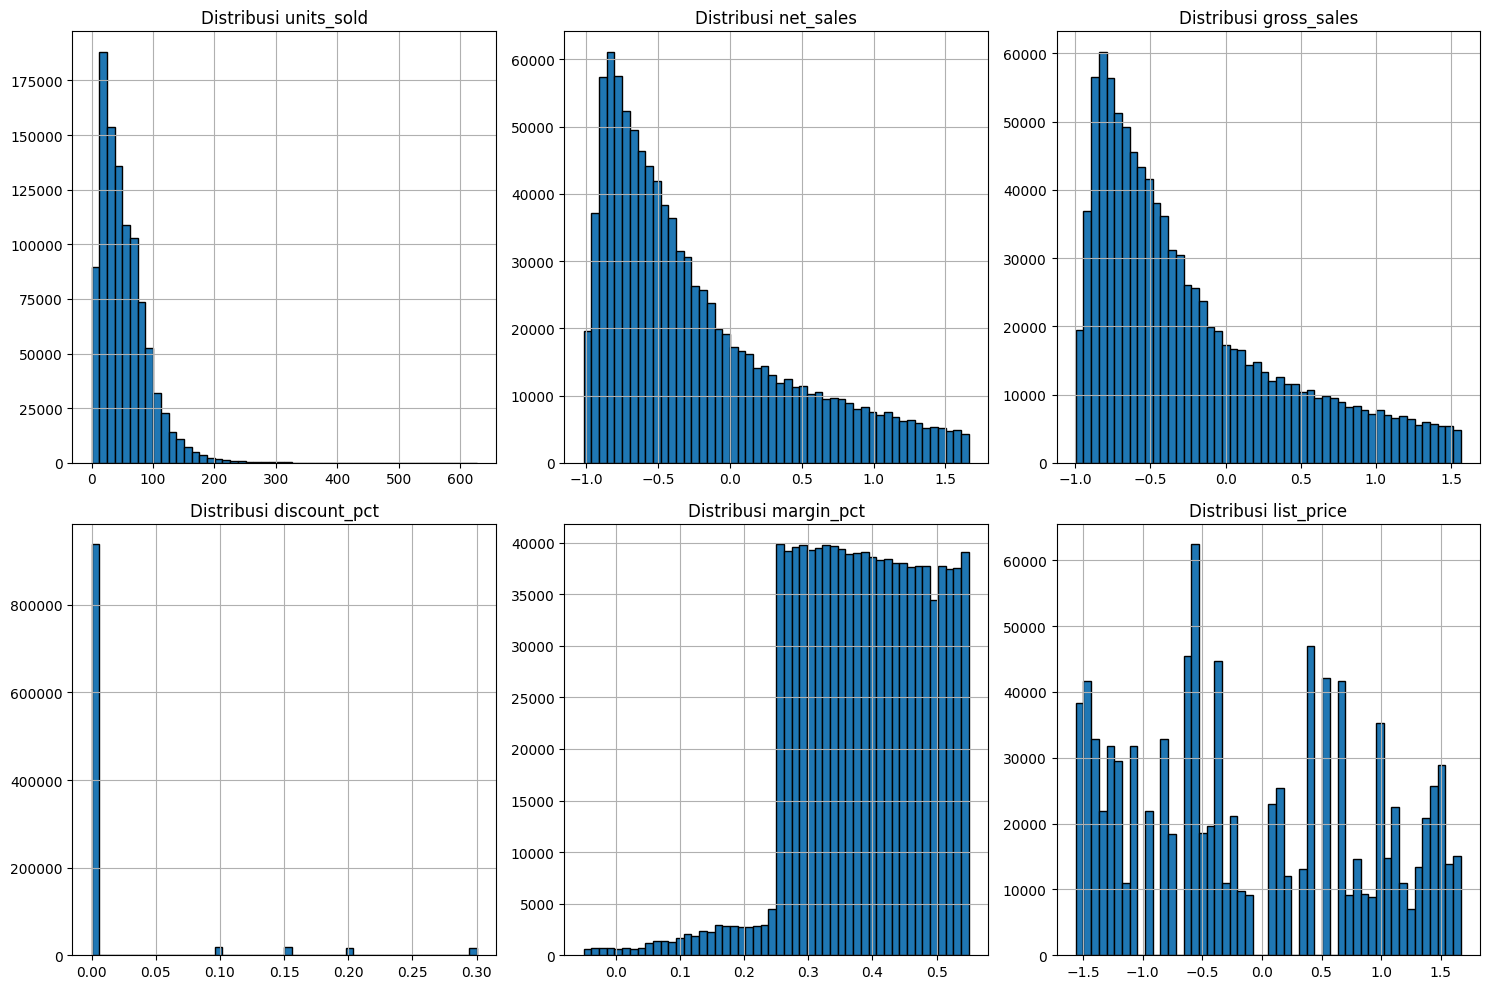

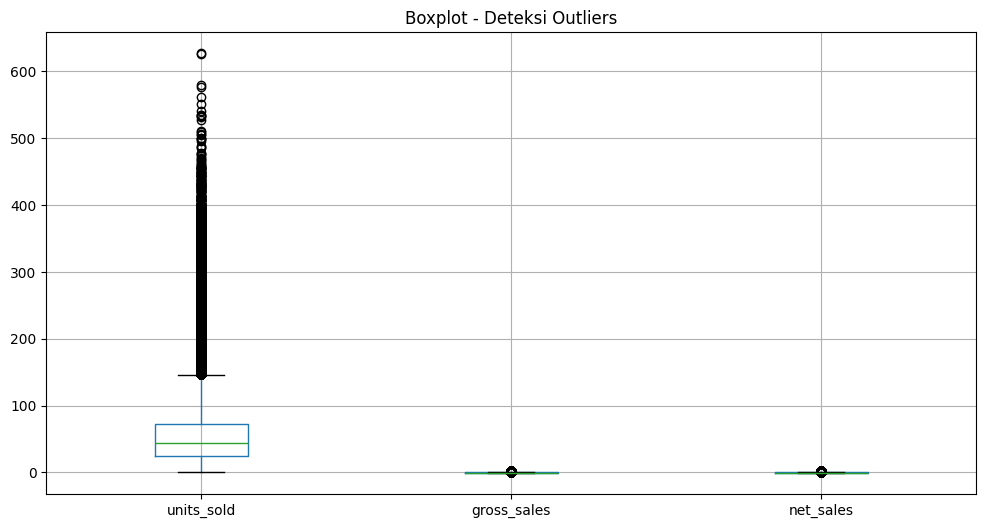

In [48]:
# Histogram untuk kolom numerik
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numerical_cols = ['units_sold', 'net_sales', 'gross_sales', 'discount_pct', 'margin_pct', 'list_price']

for ax, col in zip(axes.flatten(), numerical_cols):
    df[col].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Boxplot untuk deteksi outliers
plt.figure(figsize=(12, 6))
df[['units_sold', 'gross_sales', 'net_sales']].boxplot()
plt.title('Boxplot - Deteksi Outliers')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28692\7284707.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_sales = df.groupby('country')['net_sales'].sum().sort_values(ascending=False)


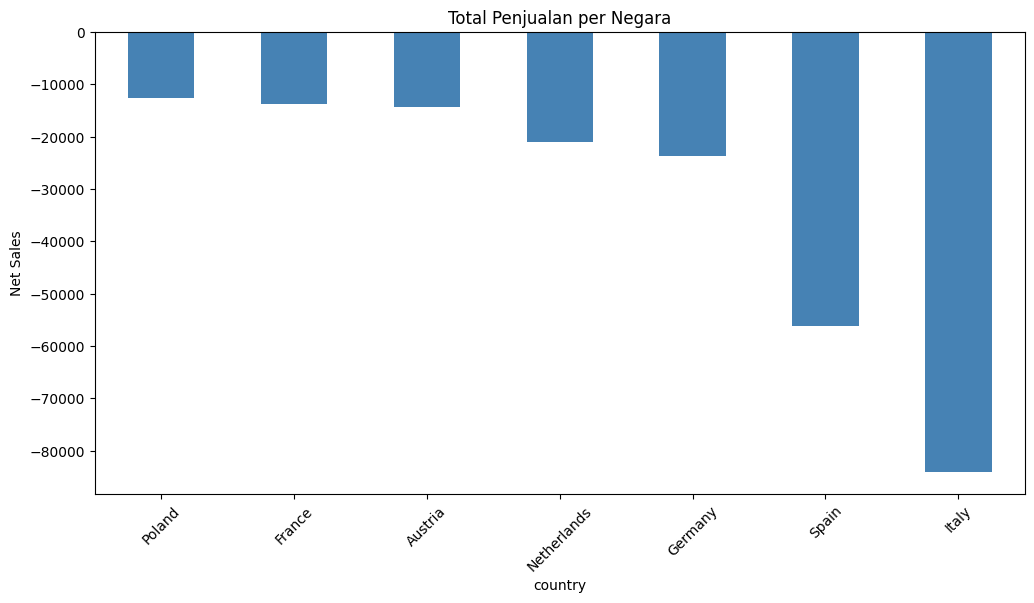

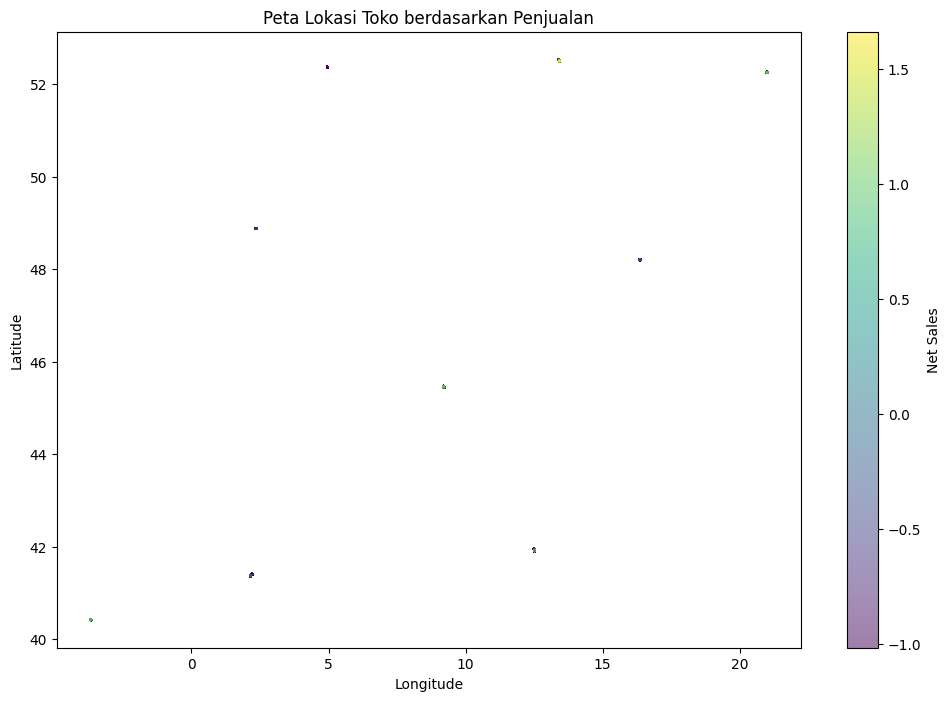

In [49]:
# Penjualan per negara
country_sales = df.groupby('country')['net_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='steelblue')
plt.title('Total Penjualan per Negara')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
plt.show()

# Scatter plot lokasi toko
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['net_sales'], cmap='viridis', alpha=0.5, s=1)
plt.colorbar(label='Net Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Peta Lokasi Toko berdasarkan Penjualan')
plt.show()

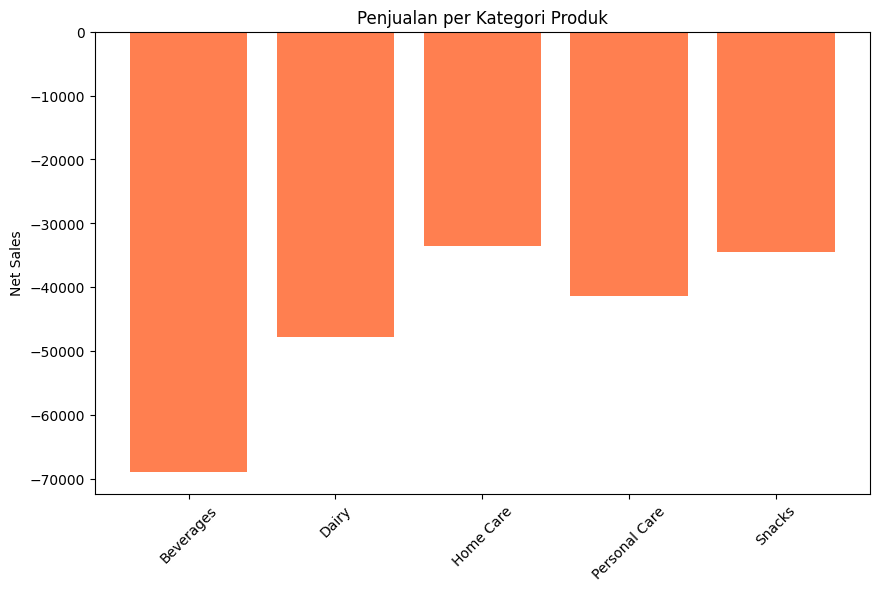

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28692\388689181.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_sales = df.groupby('brand')['net_sales'].sum().sort_values(ascending=False).head(10)


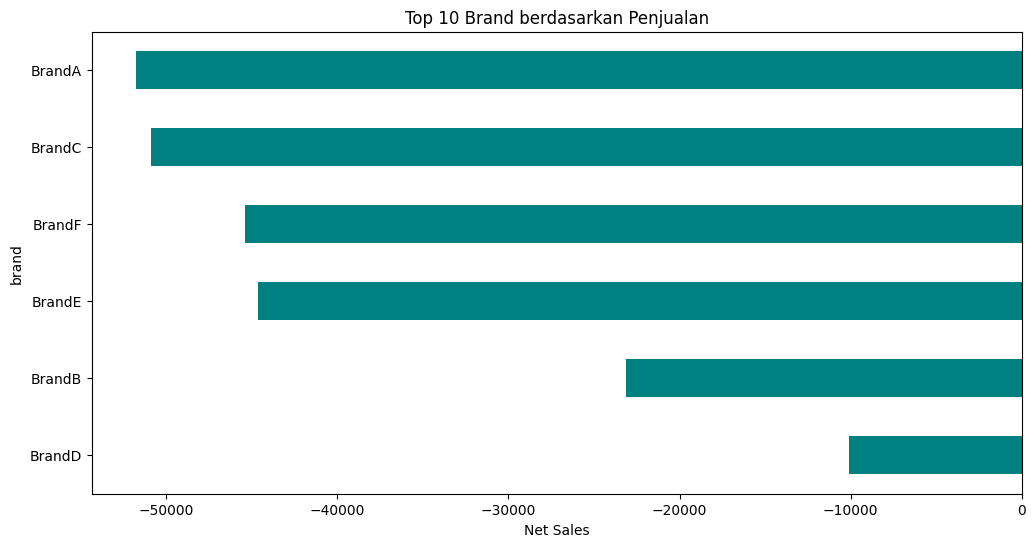

In [50]:
# Penjualan per kategori (gunakan kolom original atau aggregasi)
# Jika sudah one-hot encoded, gunakan ini:
category_cols = [col for col in df.columns if col.startswith('category_')]
category_sales = {col.replace('category_', ''): df[df[col] == True]['net_sales'].sum() 
                  for col in category_cols}

plt.figure(figsize=(10, 6))
plt.bar(category_sales.keys(), category_sales.values(), color='coral')
plt.title('Penjualan per Kategori Produk')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
plt.show()

# Top 10 Brand
brand_sales = df.groupby('brand')['net_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
brand_sales.plot(kind='barh', color='teal')
plt.title('Top 10 Brand berdasarkan Penjualan')
plt.xlabel('Net Sales')
plt.show()

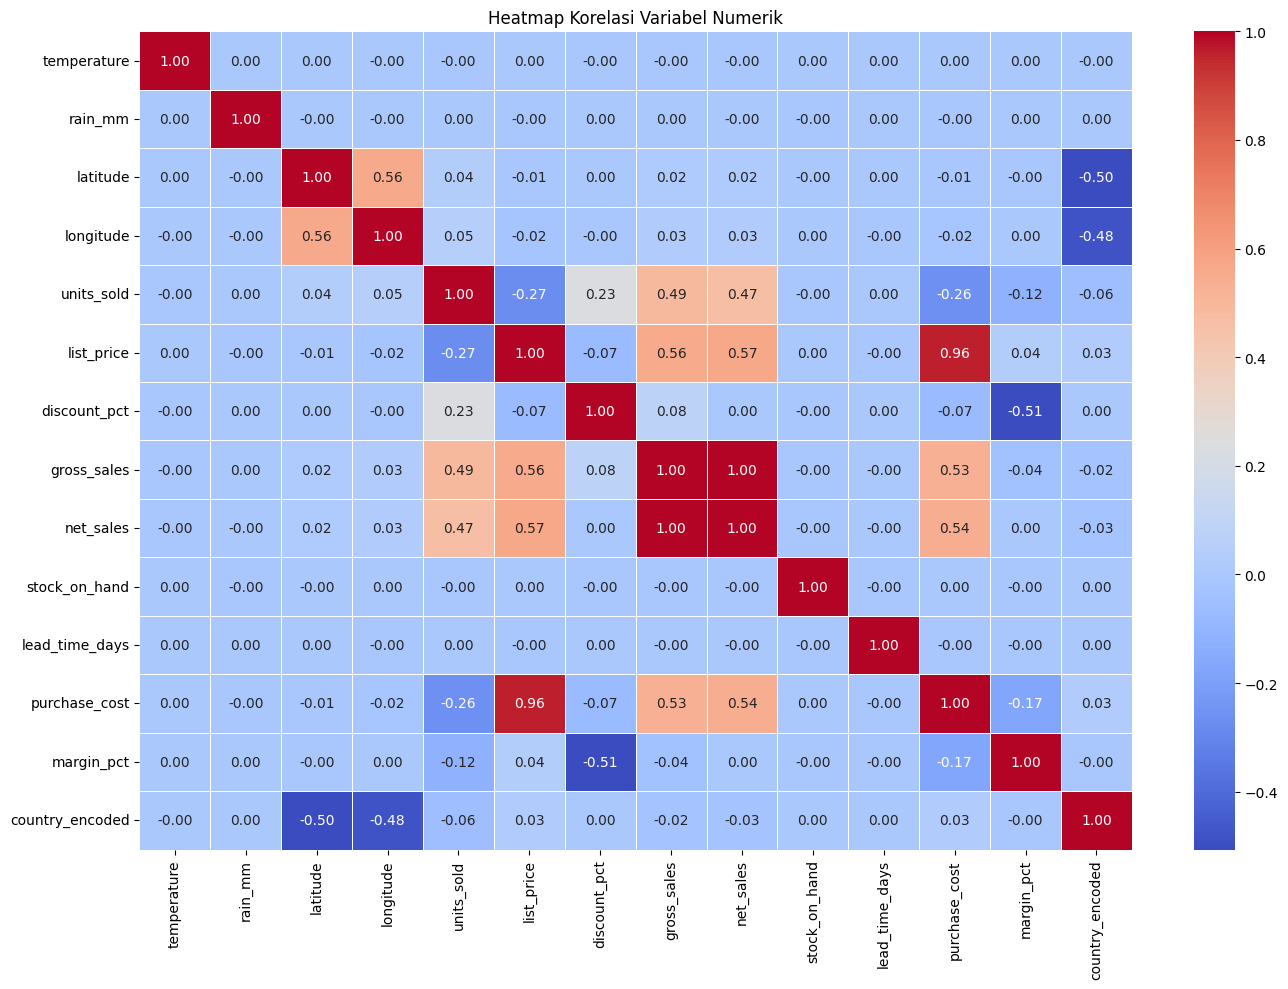

In [51]:
# Korelasi antar variabel numerik
numerical_df = df.select_dtypes(include=['float64', 'int64', 'int16', 'int8'])
plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

In [53]:
# Cell untuk menambahkan kolom waktu dari 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.dayofweek
df['weekofyear'] = df['date'].dt.isocalendar().week
df['is_weekend'] = df['weekday'].isin([5, 6])

print("Kolom waktu berhasil ditambahkan!")
print(df[['date', 'year', 'month', 'day', 'weekday', 'is_weekend']].head())

Kolom waktu berhasil ditambahkan!
        date  year  month  day  weekday  is_weekend
0 2021-01-01  2021      1    1        4       False
1 2021-01-02  2021      1    2        5        True
2 2021-01-03  2021      1    3        6        True
3 2021-01-04  2021      1    4        0       False
4 2021-01-05  2021      1    5        1       False


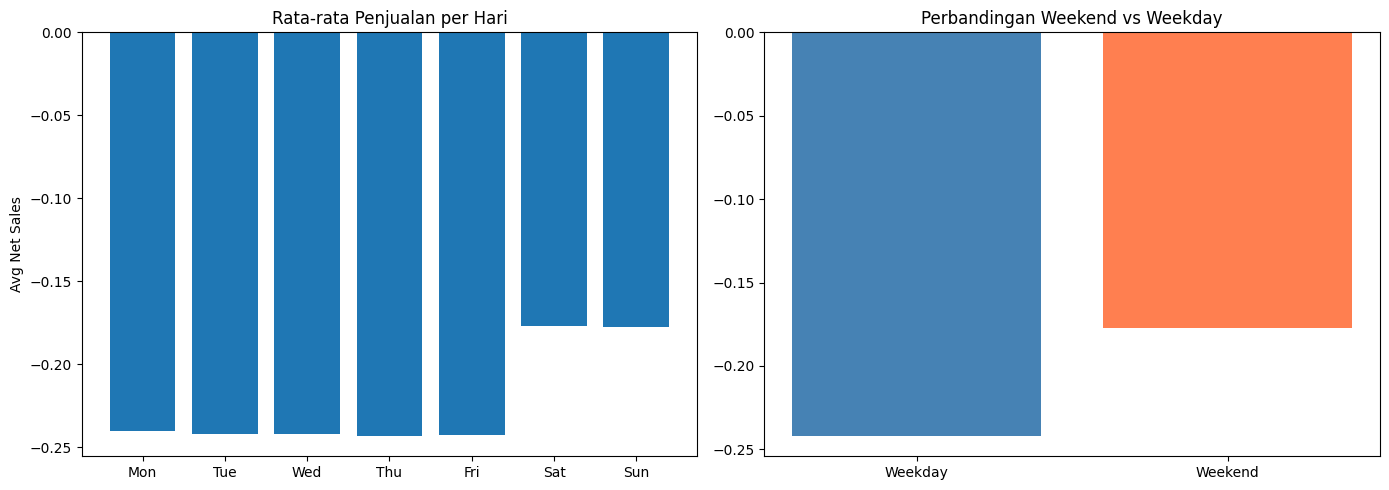

In [54]:
# Extract weekday dan is_weekend dari kolom date
df['weekday'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['weekday'].isin([5, 6])  # Saturday=5, Sunday=6

# Penjualan per hari dalam seminggu
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Per weekday
weekday_sales = df.groupby('weekday')['net_sales'].mean()
axes[0].bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], weekday_sales.values)
axes[0].set_title('Rata-rata Penjualan per Hari')
axes[0].set_ylabel('Avg Net Sales')

# Weekend vs Weekday
weekend_sales = df.groupby('is_weekend')['net_sales'].mean()
axes[1].bar(['Weekday', 'Weekend'], weekend_sales.values, color=['steelblue', 'coral'])
axes[1].set_title('Perbandingan Weekend vs Weekday')
plt.tight_layout()
plt.show()

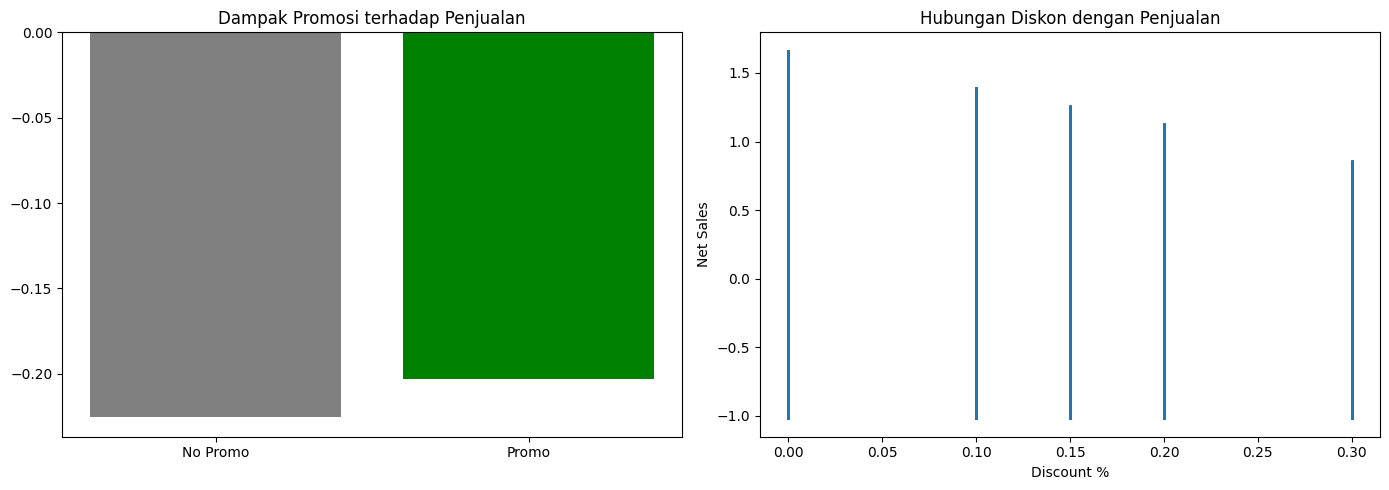

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Promo vs Non-Promo
promo_sales = df.groupby('promo_flag')['net_sales'].mean()
axes[0].bar(['No Promo', 'Promo'], promo_sales.values, color=['gray', 'green'])
axes[0].set_title('Dampak Promosi terhadap Penjualan')

# Scatter: Discount vs Sales
axes[1].scatter(df['discount_pct'], df['net_sales'], alpha=0.3, s=1)
axes[1].set_xlabel('Discount %')
axes[1].set_ylabel('Net Sales')
axes[1].set_title('Hubungan Diskon dengan Penjualan')
plt.tight_layout()
plt.show()

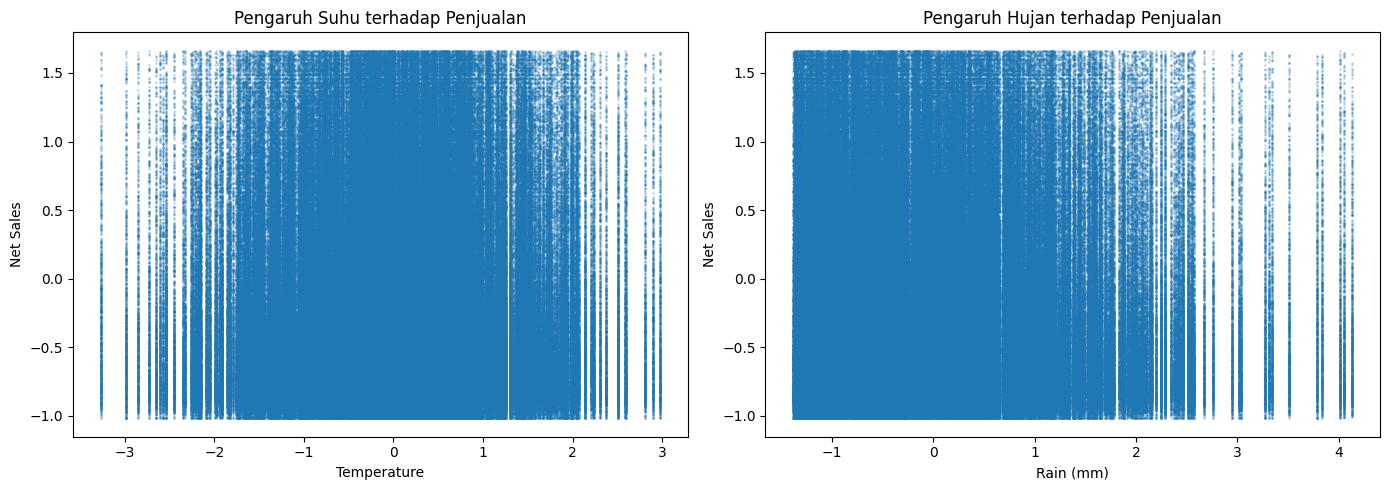

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature vs Sales
axes[0].scatter(df['temperature'], df['net_sales'], alpha=0.2, s=1)
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Net Sales')
axes[0].set_title('Pengaruh Suhu terhadap Penjualan')

# Rain vs Sales
axes[1].scatter(df['rain_mm'], df['net_sales'], alpha=0.2, s=1)
axes[1].set_xlabel('Rain (mm)')
axes[1].set_ylabel('Net Sales')
axes[1].set_title('Pengaruh Hujan terhadap Penjualan')
plt.tight_layout()
plt.show()

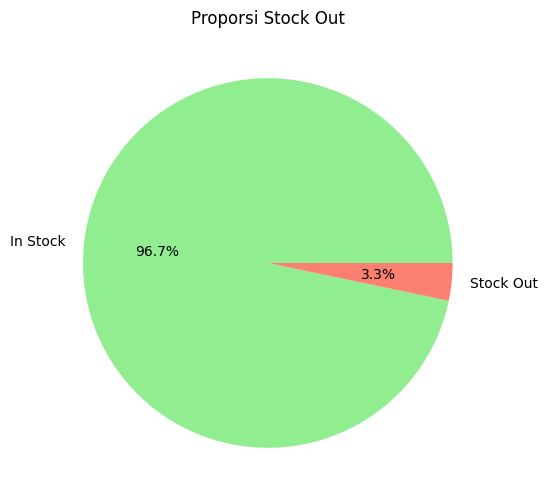

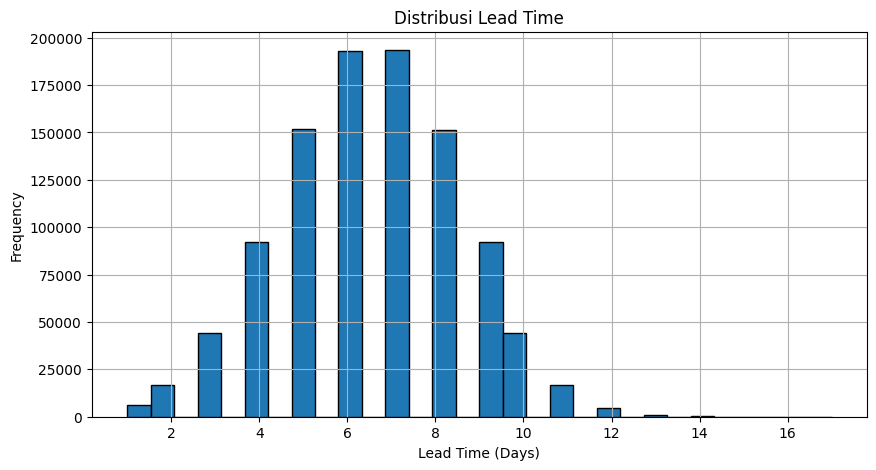

In [57]:
# Stock out analysis
stock_out = df['stock_out_flag'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(stock_out.values, labels=['In Stock', 'Stock Out'], autopct='%1.1f%%', 
        colors=['lightgreen', 'salmon'])
plt.title('Proporsi Stock Out')
plt.show()

# Lead time distribution
plt.figure(figsize=(10, 5))
df['lead_time_days'].hist(bins=30, edgecolor='black')
plt.title('Distribusi Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

In [62]:
print("\n📊 MEMORY USAGE:")
print(f"   Sebelum: {df_original.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Sesudah: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Pengurangan: {(1 - df.memory_usage(deep=True).sum() / df_original.memory_usage(deep=True).sum()) * 100:.1f}%")


print("\n📋 PERBANDINGAN TIPE DATA:")

comparison = pd.DataFrame({
    'Sebelum': df_original.dtypes,
    'Sesudah': df_processed.dtypes
})

print(comparison)


📊 MEMORY USAGE:
   Sebelum: 841.62 MB
   Sesudah: 151.05 MB
   Pengurangan: 82.1%

📋 PERBANDINGAN TIPE DATA:
                        Sebelum         Sesudah
brand                    object        category
category                 object             NaN
category_Beverages          NaN            bool
category_Dairy              NaN            bool
category_Home Care          NaN            bool
category_Personal Care      NaN            bool
category_Snacks             NaN            bool
channel                  object             NaN
channel_Convenience         NaN            bool
channel_E-commerce          NaN            bool
channel_Hypermarket         NaN            bool
channel_Supermarket         NaN            bool
city                     object        category
country                  object        category
country_encoded             NaN           int64
date                     object  datetime64[ns]
day                       int64             NaN
discount_pct            fl